In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
def image_colorfulness(image):
	# split the image into its respective RGB components
	(B, G, R) = cv2.split(image.astype("float"))
	# compute rg = R - G
	rg = np.absolute(R - G)
	# compute yb = 0.5 * (R + G) - B
	yb = np.absolute(0.5 * (R + G) - B)
	# compute the mean and standard deviation of both `rg` and `yb`
	(rbMean, rbStd) = (np.mean(rg), np.std(rg))
	(ybMean, ybStd) = (np.mean(yb), np.std(yb))
	# combine the mean and standard deviations
	stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
	meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
	# derive the "colorfulness" metric and return it
	return stdRoot + (0.3 * meanRoot)

In [7]:
ipd.Video('../data/video/train/--J7F6khJD0.mp4', width=800)

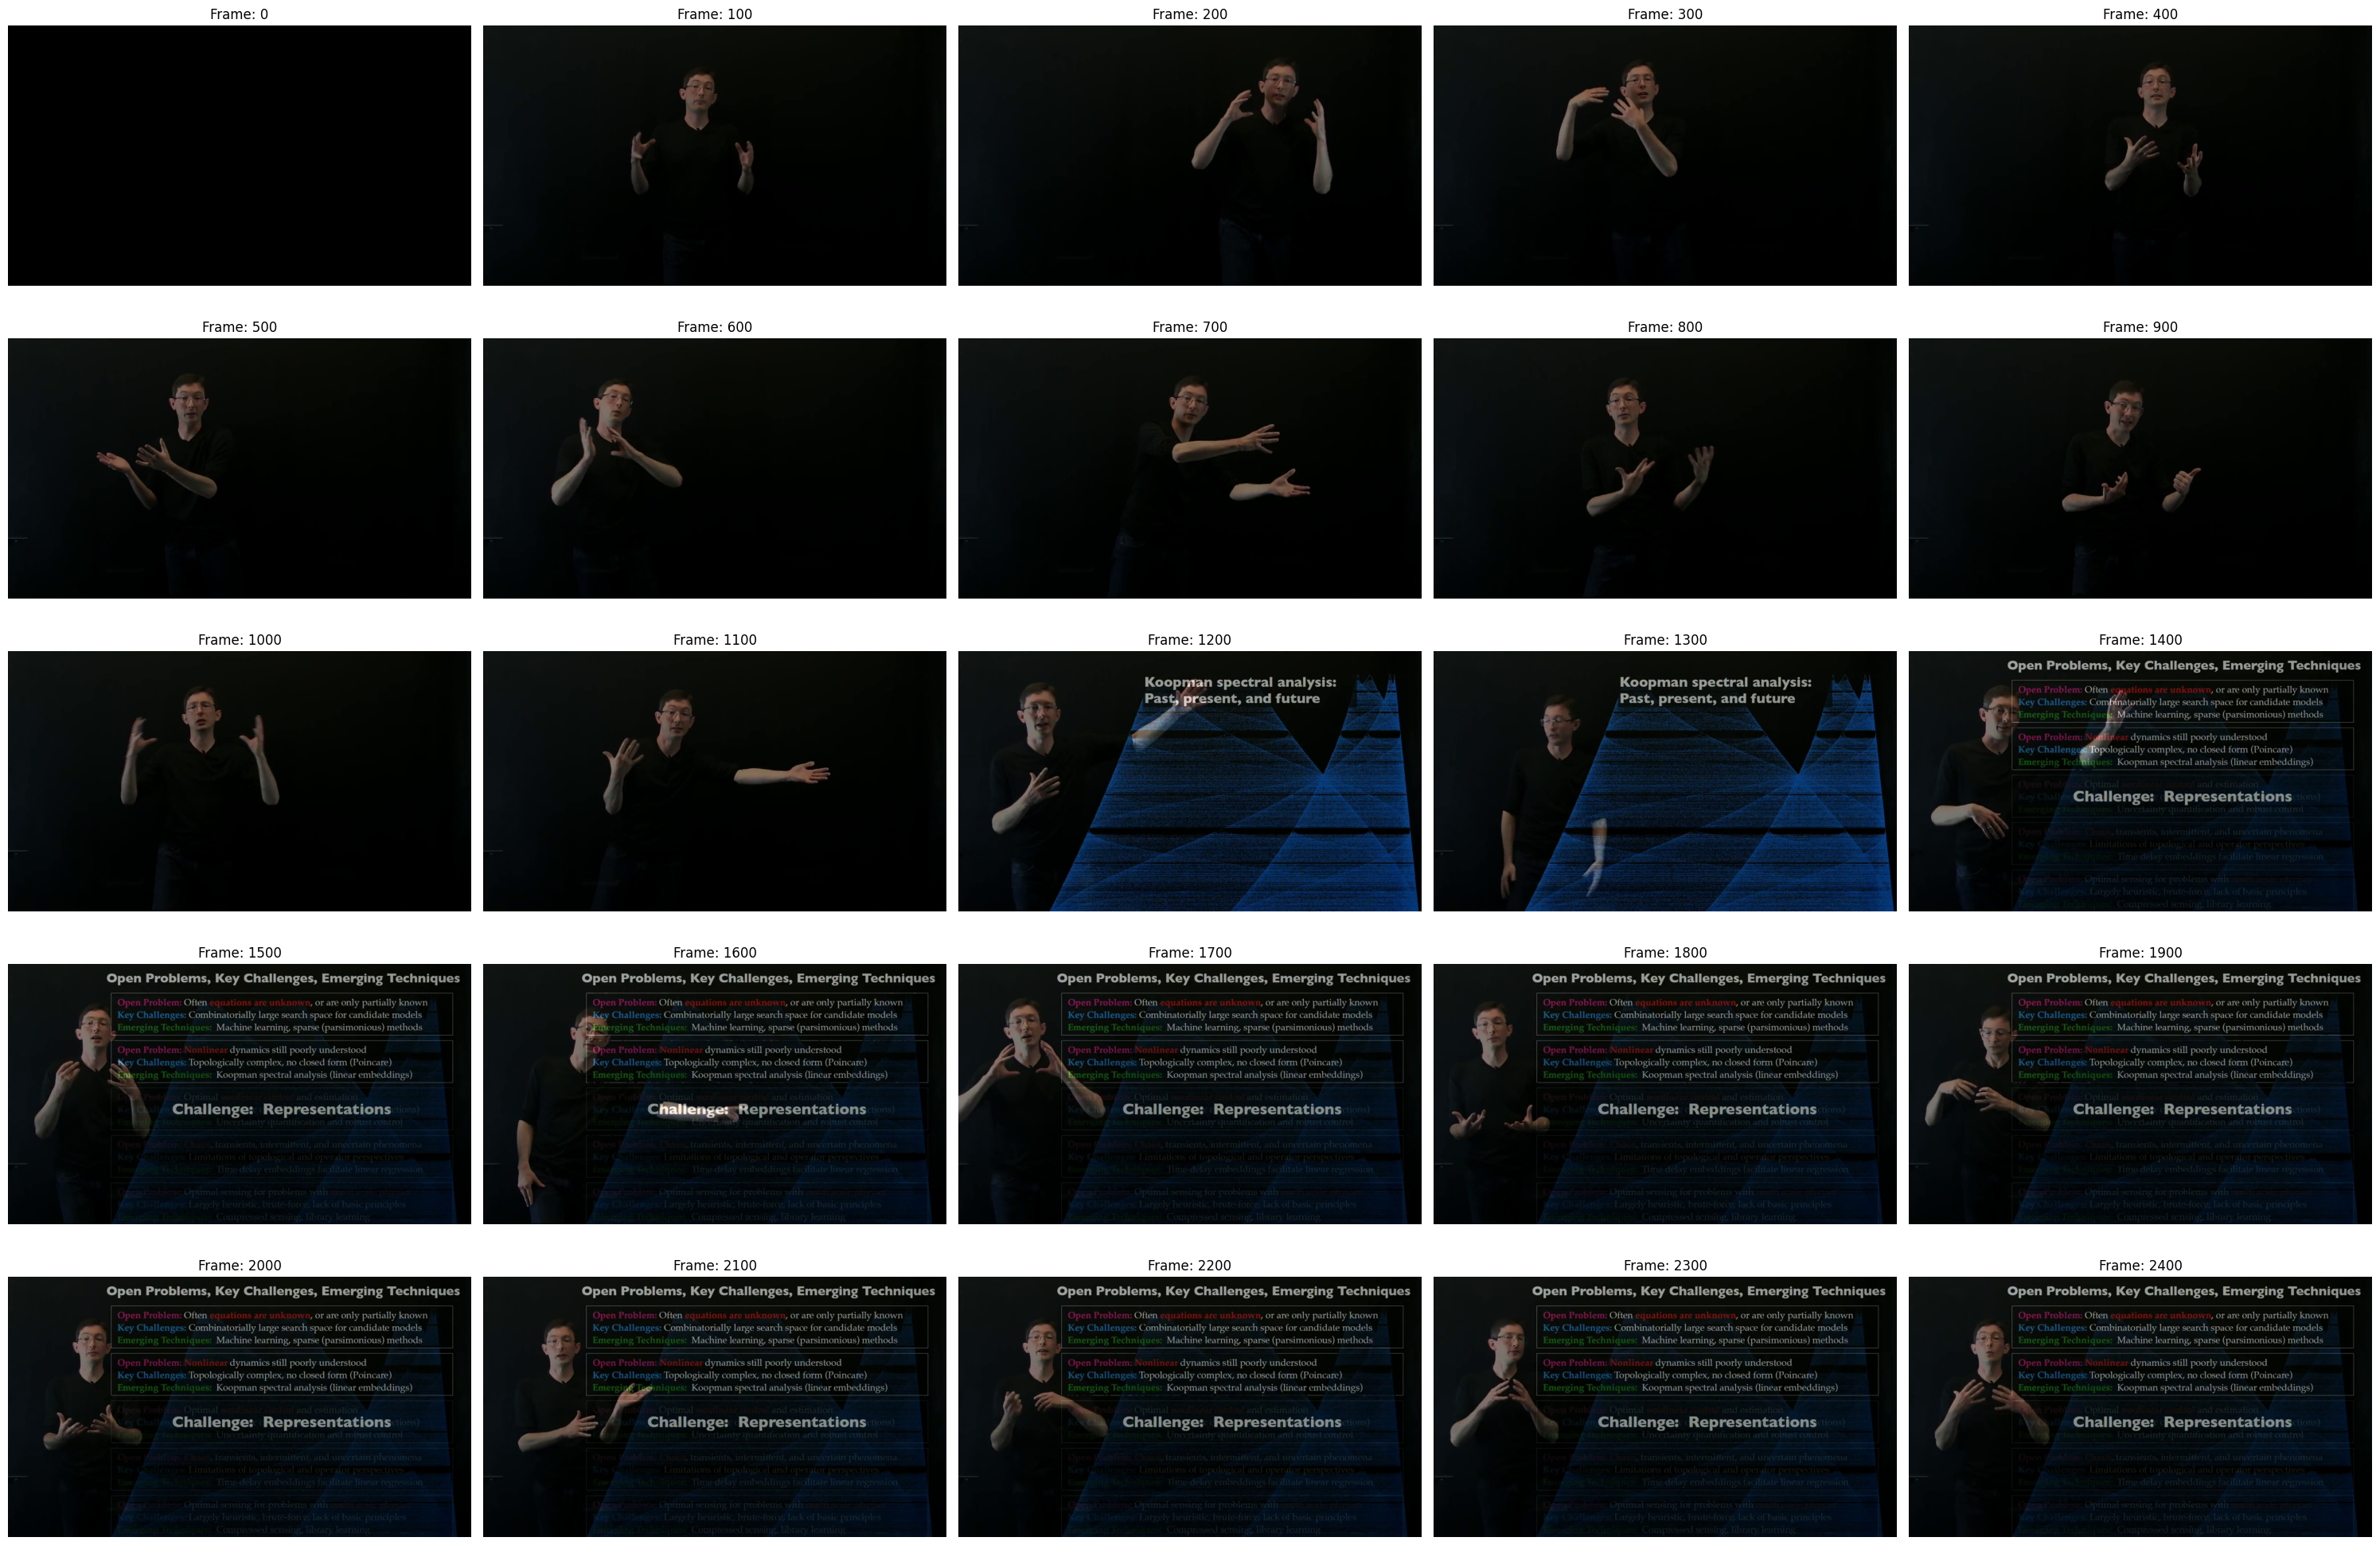

In [11]:
cap = cv2.VideoCapture('../data/video/train/--J7F6khJD0.mp4')
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

img_idx = 0
for frame in range(2500):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1
        
plt.tight_layout()
plt.show()

In [4]:
cap = cv2.VideoCapture('../data/video/train/--J7F6khJD0.mp4')
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
colorfulness_results = []
for frame in range(int(total_frames)):
    _, img = cap.read()
    if frame % 50 == 0:
        colorfulness_results.append(image_colorfulness(img))
print(colorfulness_results)

[0.0, 17.19018801608041, 5.124722823148588, 5.492195558529984, 5.786736715165375, 5.850317013604974, 6.559232332603771, 5.488898144788056, 5.226636884558805, 5.556960810342122, 5.552837819855595, 5.045393241624462, 5.602816629130473, 6.641791345342804, 6.962972287447594, 5.882881360216396, 5.379583604315862, 5.696127665477146, 5.216366208955259, 5.760391486112158, 5.5175403521839925, 5.960010365501077, 6.300569685782583, 32.23758142297263, 32.12094879994766, 32.04543168762003, 32.02543352313493, 13.586148961701232, 13.44947913336153, 13.630534569723698, 13.49465437899857, 13.32602395829224, 13.466407560940981, 13.40176614736647, 13.564111002575176, 13.597083272174535, 13.322535030009268, 13.617833519677465, 13.374130379853165, 13.374101607677474, 13.407647550110937, 13.525926035414626, 13.622070610177968, 13.52217562699387, 13.526950648316449, 13.28876465085622, 13.389963434134454, 13.357546672313232, 13.553171271418377, 13.366395983747893, 13.537940879101026, 13.404180838998625, 13.38

In [5]:
print(np.mean(colorfulness_results))

13.279667716661935


In [8]:
validate_df = pd.read_csv('../data/dataset/validation/validation_no_transcript.csv')
visual_df = pd.DataFrame(columns=['id', 'colorfulness'])
for video_id in validate_df['id']:
    video_file = f'../data/video/validation/{video_id}.mp4'
    cap = cv2.VideoCapture(video_file)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    colorfulness_results = []
    for frame in range(int(total_frames)):
        _, img = cap.read()
        if frame % 50 == 0:
            colorfulness_results.append(image_colorfulness(img))
    colorfulness = np.mean(colorfulness_results)

    # Add row to df
    new_row = {'id': video_id, 'colorfulness': colorfulness}
    visual_df = pd.concat([visual_df, pd.DataFrame([new_row])], ignore_index=True)

    # print out df
    print(visual_df)

            id  colorfulness
0  vNoFdtcPFdk     10.615608
            id  colorfulness
0  vNoFdtcPFdk     10.615608
1  H0Zbg_CqMCs      8.093725
            id  colorfulness
0  vNoFdtcPFdk     10.615608
1  H0Zbg_CqMCs      8.093725
2  M0ewnewuciY     15.908536
            id  colorfulness
0  vNoFdtcPFdk     10.615608
1  H0Zbg_CqMCs      8.093725
2  M0ewnewuciY     15.908536
3  D1WfID6kk90     12.823557
            id  colorfulness
0  vNoFdtcPFdk     10.615608
1  H0Zbg_CqMCs      8.093725
2  M0ewnewuciY     15.908536
3  D1WfID6kk90     12.823557
4  q1phVuNCuf0     11.141953
            id  colorfulness
0  vNoFdtcPFdk     10.615608
1  H0Zbg_CqMCs      8.093725
2  M0ewnewuciY     15.908536
3  D1WfID6kk90     12.823557
4  q1phVuNCuf0     11.141953
5  sooj-_bXWgk     11.232363
            id  colorfulness
0  vNoFdtcPFdk     10.615608
1  H0Zbg_CqMCs      8.093725
2  M0ewnewuciY     15.908536
3  D1WfID6kk90     12.823557
4  q1phVuNCuf0     11.141953
5  sooj-_bXWgk     11.232363
6  sQvrK8AGCAo

In [9]:
visual_df.to_csv("../data/dataset/validation/validation_visual.csv", header=True, index=False)